# Exponential Smoothing

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
df = pd.read_csv('international-airline-passengers.csv')

df

,1949-01,112
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135
...,...,...
138,1960-08,606
139,1960-09,508
140,1960-10,461
141,1960-11,390


In [3]:
df = pd.read_csv('international-airline-passengers.csv', header = None)

df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Changing the column names

In [4]:
df.columns = ['date', 'passengers']

df.head()

,date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Formatting the date column

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

df.head()

,date,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
print('Time period start: {}\nTime period end: {}'.format(df.date.min(),df.date.max()))

Time period start: 1949-01-01 00:00:00
Time period end: 1960-12-01 00:00:00


### Making date column the index column

In [7]:
df = df.set_index('date')

df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
df.isnull().sum()

passengers    0
dtype: int64

In [10]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Log Transformation

In [12]:
data = df

data_log = np.log(data)

data_log.head()

,passengers
date,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


## Model Making

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing

In [20]:
model = ExponentialSmoothing(data_log, trend="add",seasonal="add")

model_fit = model.fit()

C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [21]:
predictions = model_fit.predict(start=144, end=200)

In [22]:
predictions.head()

1961-01-01    6.112514
1961-02-01    6.058410
1961-03-01    6.183241
1961-04-01    6.234993
1961-05-01    6.265337
Freq: MS, dtype: float64

In [23]:
predictions.shape

(57,)

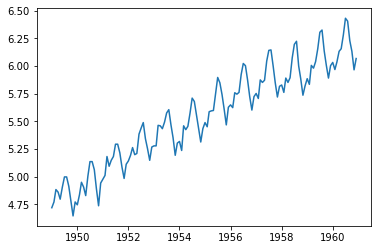

In [24]:
plt.plot(data_log)

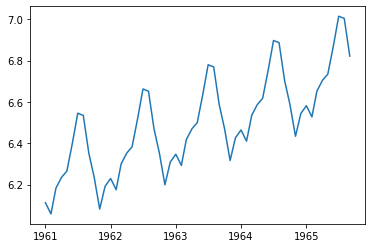

In [25]:
plt.plot(predictions)

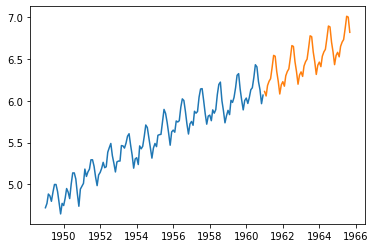

In [27]:
plt.plot(data_log)

plt.plot(predictions)

### Model has given pretty good predictions